In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/vehical(june 2022).csv', encoding='UTF-8')
df.head(33)

,STATE,ZONE,ESTIMATED POPULATION,PER CAPITA INCOME,2 WHEELER,PASSENGER,COMMERCIAL,3 WHEELER,2 WHEELER - EV,3 WHEELER - EV
0,ANDAMAN & NICOBAR,Southern,4 Lakh,"2,29,000",70,0,436,143,2,0
1,ANDHRA PRADESH,Southern,5.3 Crore,"1,92,587","13,063","1,085",0,51,"1,028",1
2,ARUNACHAL PRADESH,North-Eastern,15.48 Lakh,"2,15,897","1,241","1,183",79,11,1,1
3,ASSAM,Central,3.54 Crore,"1,02,965","21,775","7,964",214,213,194,"1,761"
4,BIHAR,Eastern,12.49 Crore,"49,470","79,891","7,598","1,228",813,"1,199","1,465"
5,CHANDIGARH,Northern,12.77 Lakh,"3,49,373","1,740","1,914",16,31,88,35
6,CHHATTISGARH,Central,2.98 Crore,"1,20,704","26,939","4,860",977,70,"1,133",200
7,DELHI,Northern,10.77 Lakh,"3,89,529","25,408","16,688",225,178,"2,341",974
8,DNH & DD,Western,2.10 Crore,"3,00,000",0,0,760,490,146,12
9,GOA,Western,15.67 Lakh,"4,72,070","2,566","1,472",49,143,328,0


In [3]:
df.describe()

,STATE,ZONE,ESTIMATED POPULATION,PER CAPITA INCOME,2 WHEELER,PASSENGER,COMMERCIAL,3 WHEELER,2 WHEELER - EV,3 WHEELER - EV
count,33,33,33,33,33,33,33,33,33,33
unique,33,7,32,33,33,31,33,32,30,23
top,ANDAMAN & NICOBAR,North-Eastern,2.98 Crore,"2,29,000",70,0,436,143,2,0
freq,1,7,2,1,1,3,1,2,3,9


In [4]:
df.columns

Index(['STATE', 'ZONE', 'ESTIMATED POPULATION', 'PER CAPITA INCOME',
       '2 WHEELER', 'PASSENGER', 'COMMERCIAL', '3 WHEELER', '2 WHEELER - EV',
       '3 WHEELER - EV'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   STATE                 33 non-null     object
 1   ZONE                  33 non-null     object
 2   ESTIMATED POPULATION  33 non-null     object
 3   PER CAPITA INCOME     33 non-null     object
 4   2 WHEELER             33 non-null     object
 5   PASSENGER             33 non-null     object
 6   COMMERCIAL            33 non-null     object
 7   3 WHEELER             33 non-null     object
 8   2 WHEELER - EV        33 non-null     object
 9   3 WHEELER - EV        33 non-null     object
dtypes: object(10)
memory usage: 2.7+ KB


In [6]:
df.shape 

(33, 10)

In [7]:
def removeLakhCrore(Value):
     # Remove non-breaking space ('\xa0') and 'Lakh' characters, and replace commas with empty string
    Value = Value.replace('\xa0', ' ').replace(',', '')

    # Remove any non-numeric characters, including spaces
    numeric_value = Value.split(' ')
    # Convert the numeric string to an integer
    numeric_value1 = float(numeric_value[0])

    # Multiply by 1,000,00 to convert Lakh  and 10000000 to convert Crore to the numeric representation
    
    if numeric_value[1] == 'Lakh' or numeric_value[1] == 'Lakhs':
        numeric_value1 *= 100000
    if numeric_value[1] == 'Crore' or numeric_value[1] == 'Crores':
        numeric_value1 *= 10000000
    
    return (int(numeric_value1))


df['ESTIMATED POPULATION'] = df['ESTIMATED POPULATION'].apply(removeLakhCrore)

In [8]:
df.isnull().sum()

STATE                   0
ZONE                    0
ESTIMATED POPULATION    0
PER CAPITA INCOME       0
2 WHEELER               0
PASSENGER               0
COMMERCIAL              0
3 WHEELER               0
2 WHEELER - EV          0
3 WHEELER - EV          0
dtype: int64

In [9]:
def convert_to_integer(value_with_commas):
    # Check if the value is 'nan' and return 0 in that case
    if pd.isna(value_with_commas):
        return 0 
    
    # Remove commas and spaces from the value
    cleaned_value = str(value_with_commas).replace(",", "").replace(" ", "")
    
    # Convert the cleaned value to an integer
    return int(cleaned_value)

# Assuming df['ESTIMATED POPULATION'] is a Series
df['ESTIMATED POPULATION'] = df['ESTIMATED POPULATION'].apply(convert_to_integer)

# Handle other columns in a similar way
columns_to_convert = ['PER CAPITA INCOME', '2 WHEELER', 'PASSENGER', 'COMMERCIAL', '3 WHEELER', '2 WHEELER - EV', '3 WHEELER - EV']
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_integer)


In [10]:
df.head(20)

,STATE,ZONE,ESTIMATED POPULATION,PER CAPITA INCOME,2 WHEELER,PASSENGER,COMMERCIAL,3 WHEELER,2 WHEELER - EV,3 WHEELER - EV
0,ANDAMAN & NICOBAR,Southern,400000,229000,70,0,436,143,2,0
1,ANDHRA PRADESH,Southern,53000000,192587,13063,1085,0,51,1028,1
2,ARUNACHAL PRADESH,North-Eastern,1548000,215897,1241,1183,79,11,1,1
3,ASSAM,Central,35400000,102965,21775,7964,214,213,194,1761
4,BIHAR,Eastern,124900000,49470,79891,7598,1228,813,1199,1465
5,CHANDIGARH,Northern,1277000,349373,1740,1914,16,31,88,35
6,CHHATTISGARH,Central,29800000,120704,26939,4860,977,70,1133,200
7,DELHI,Northern,1077000,389529,25408,16688,225,178,2341,974
8,DNH & DD,Western,21000000,300000,0,0,760,490,146,12
9,GOA,Western,1567000,472070,2566,1472,49,143,328,0


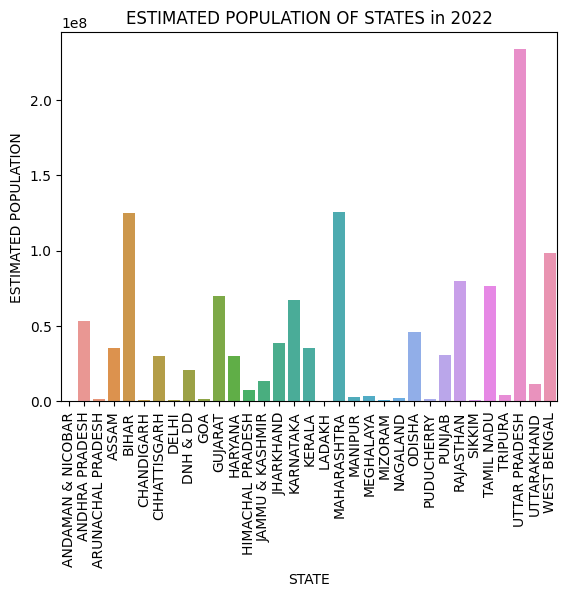

In [11]:
sns.barplot(x='STATE', y='ESTIMATED POPULATION', data=df)
plt.title('ESTIMATED POPULATION OF STATES in 2022')
plt.xlabel('STATE')
plt.ylabel('ESTIMATED POPULATION')
plt.xticks(rotation=90)
plt.show()

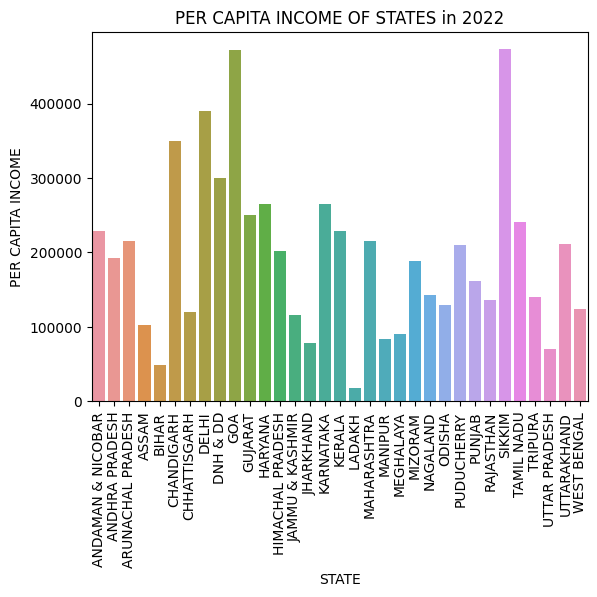

In [12]:
sns.barplot(x='STATE', y='PER CAPITA INCOME', data=df)
plt.title('PER CAPITA INCOME OF STATES in 2022')
plt.xlabel('STATE')
plt.ylabel('PER CAPITA INCOME')
plt.xticks(rotation=90)
plt.show()

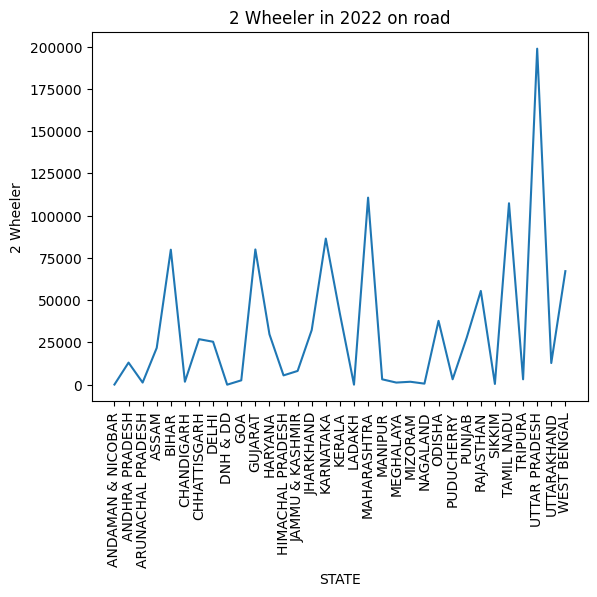

In [13]:
sns.lineplot(x='STATE', y='2 WHEELER', data=df)
plt.title('2 Wheeler in 2022 on road')
plt.xlabel('STATE')
plt.ylabel('2 Wheeler')
plt.xticks(rotation=90)
plt.show()

## Visualization

In [14]:
# Distribution of numeric features
numeric_features = df.select_dtypes(include=[np.number])

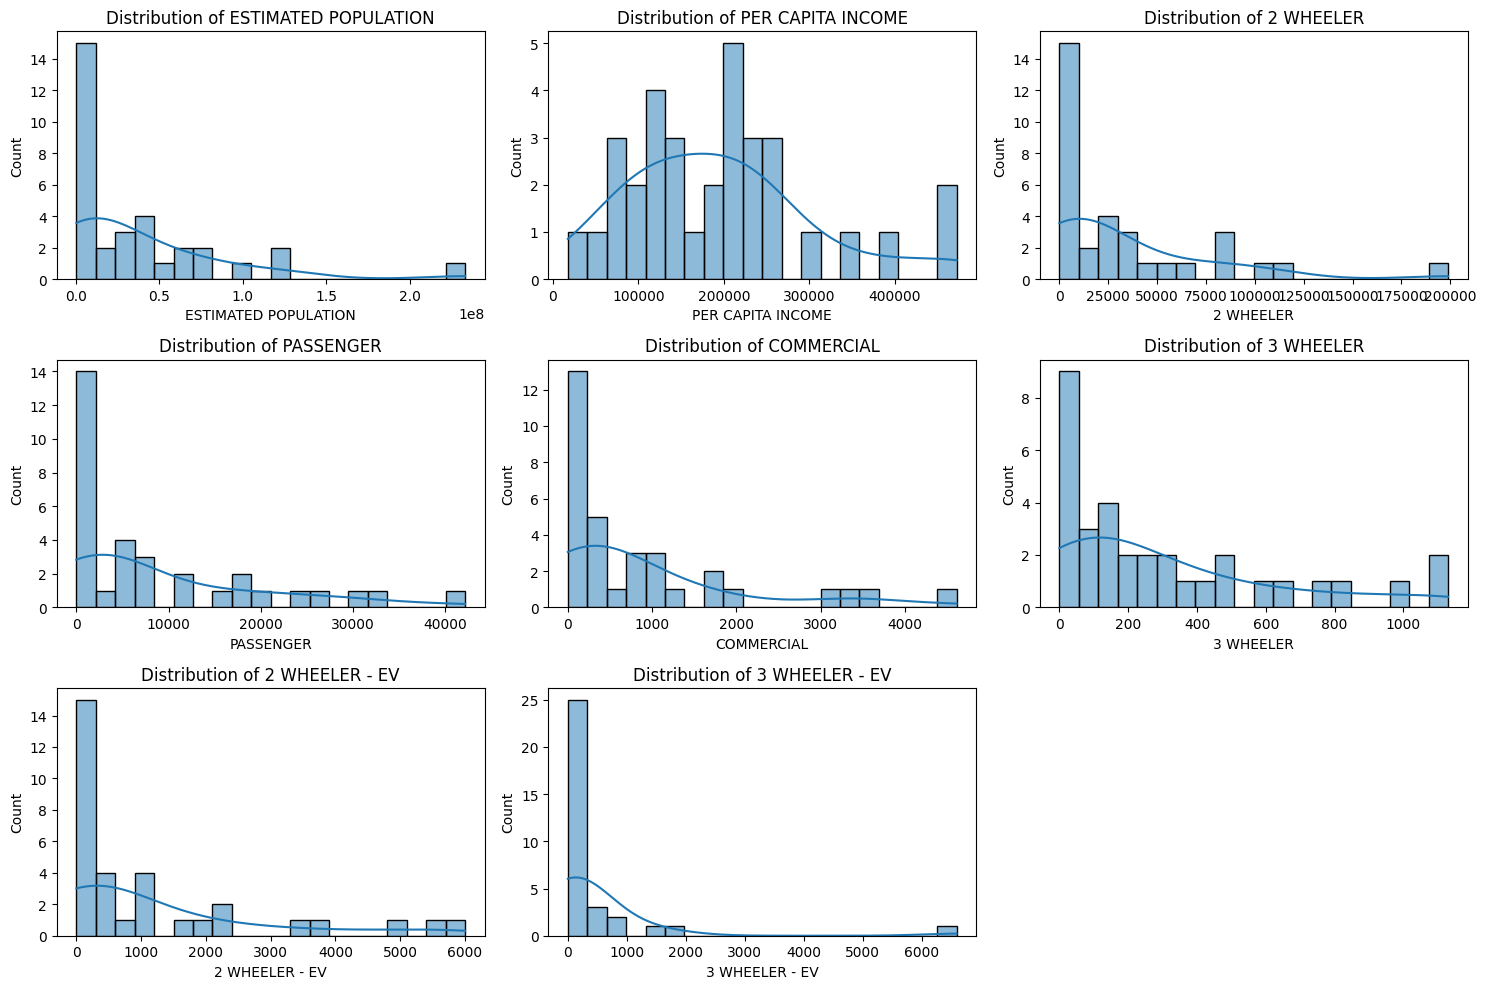

In [15]:
# Histograms of numeric features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

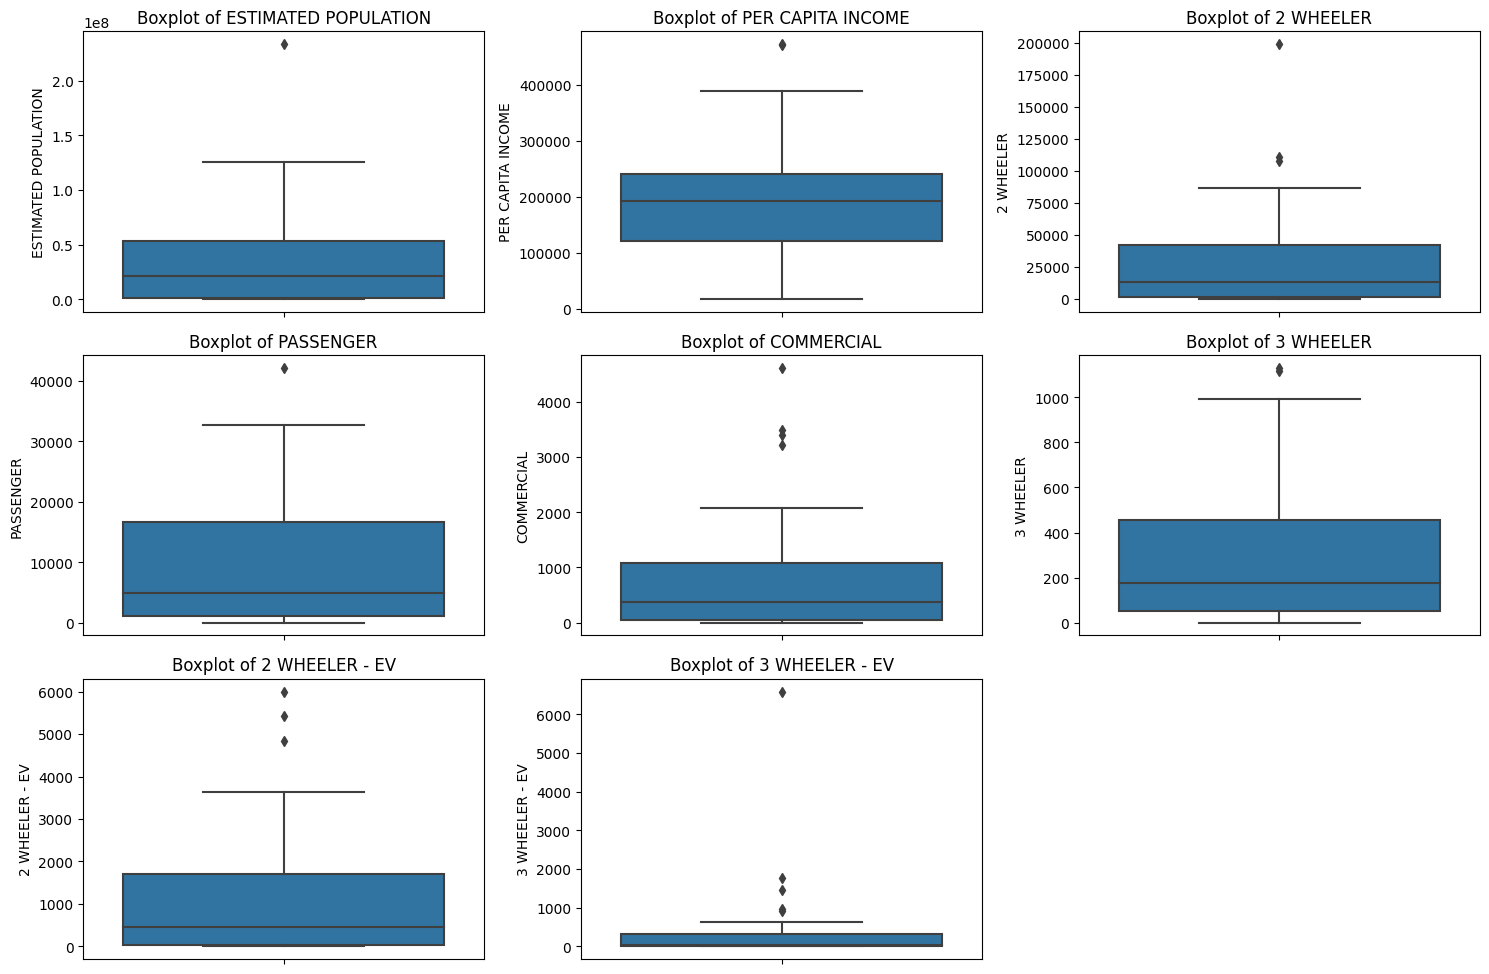

In [16]:
# Boxplots for numeric features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

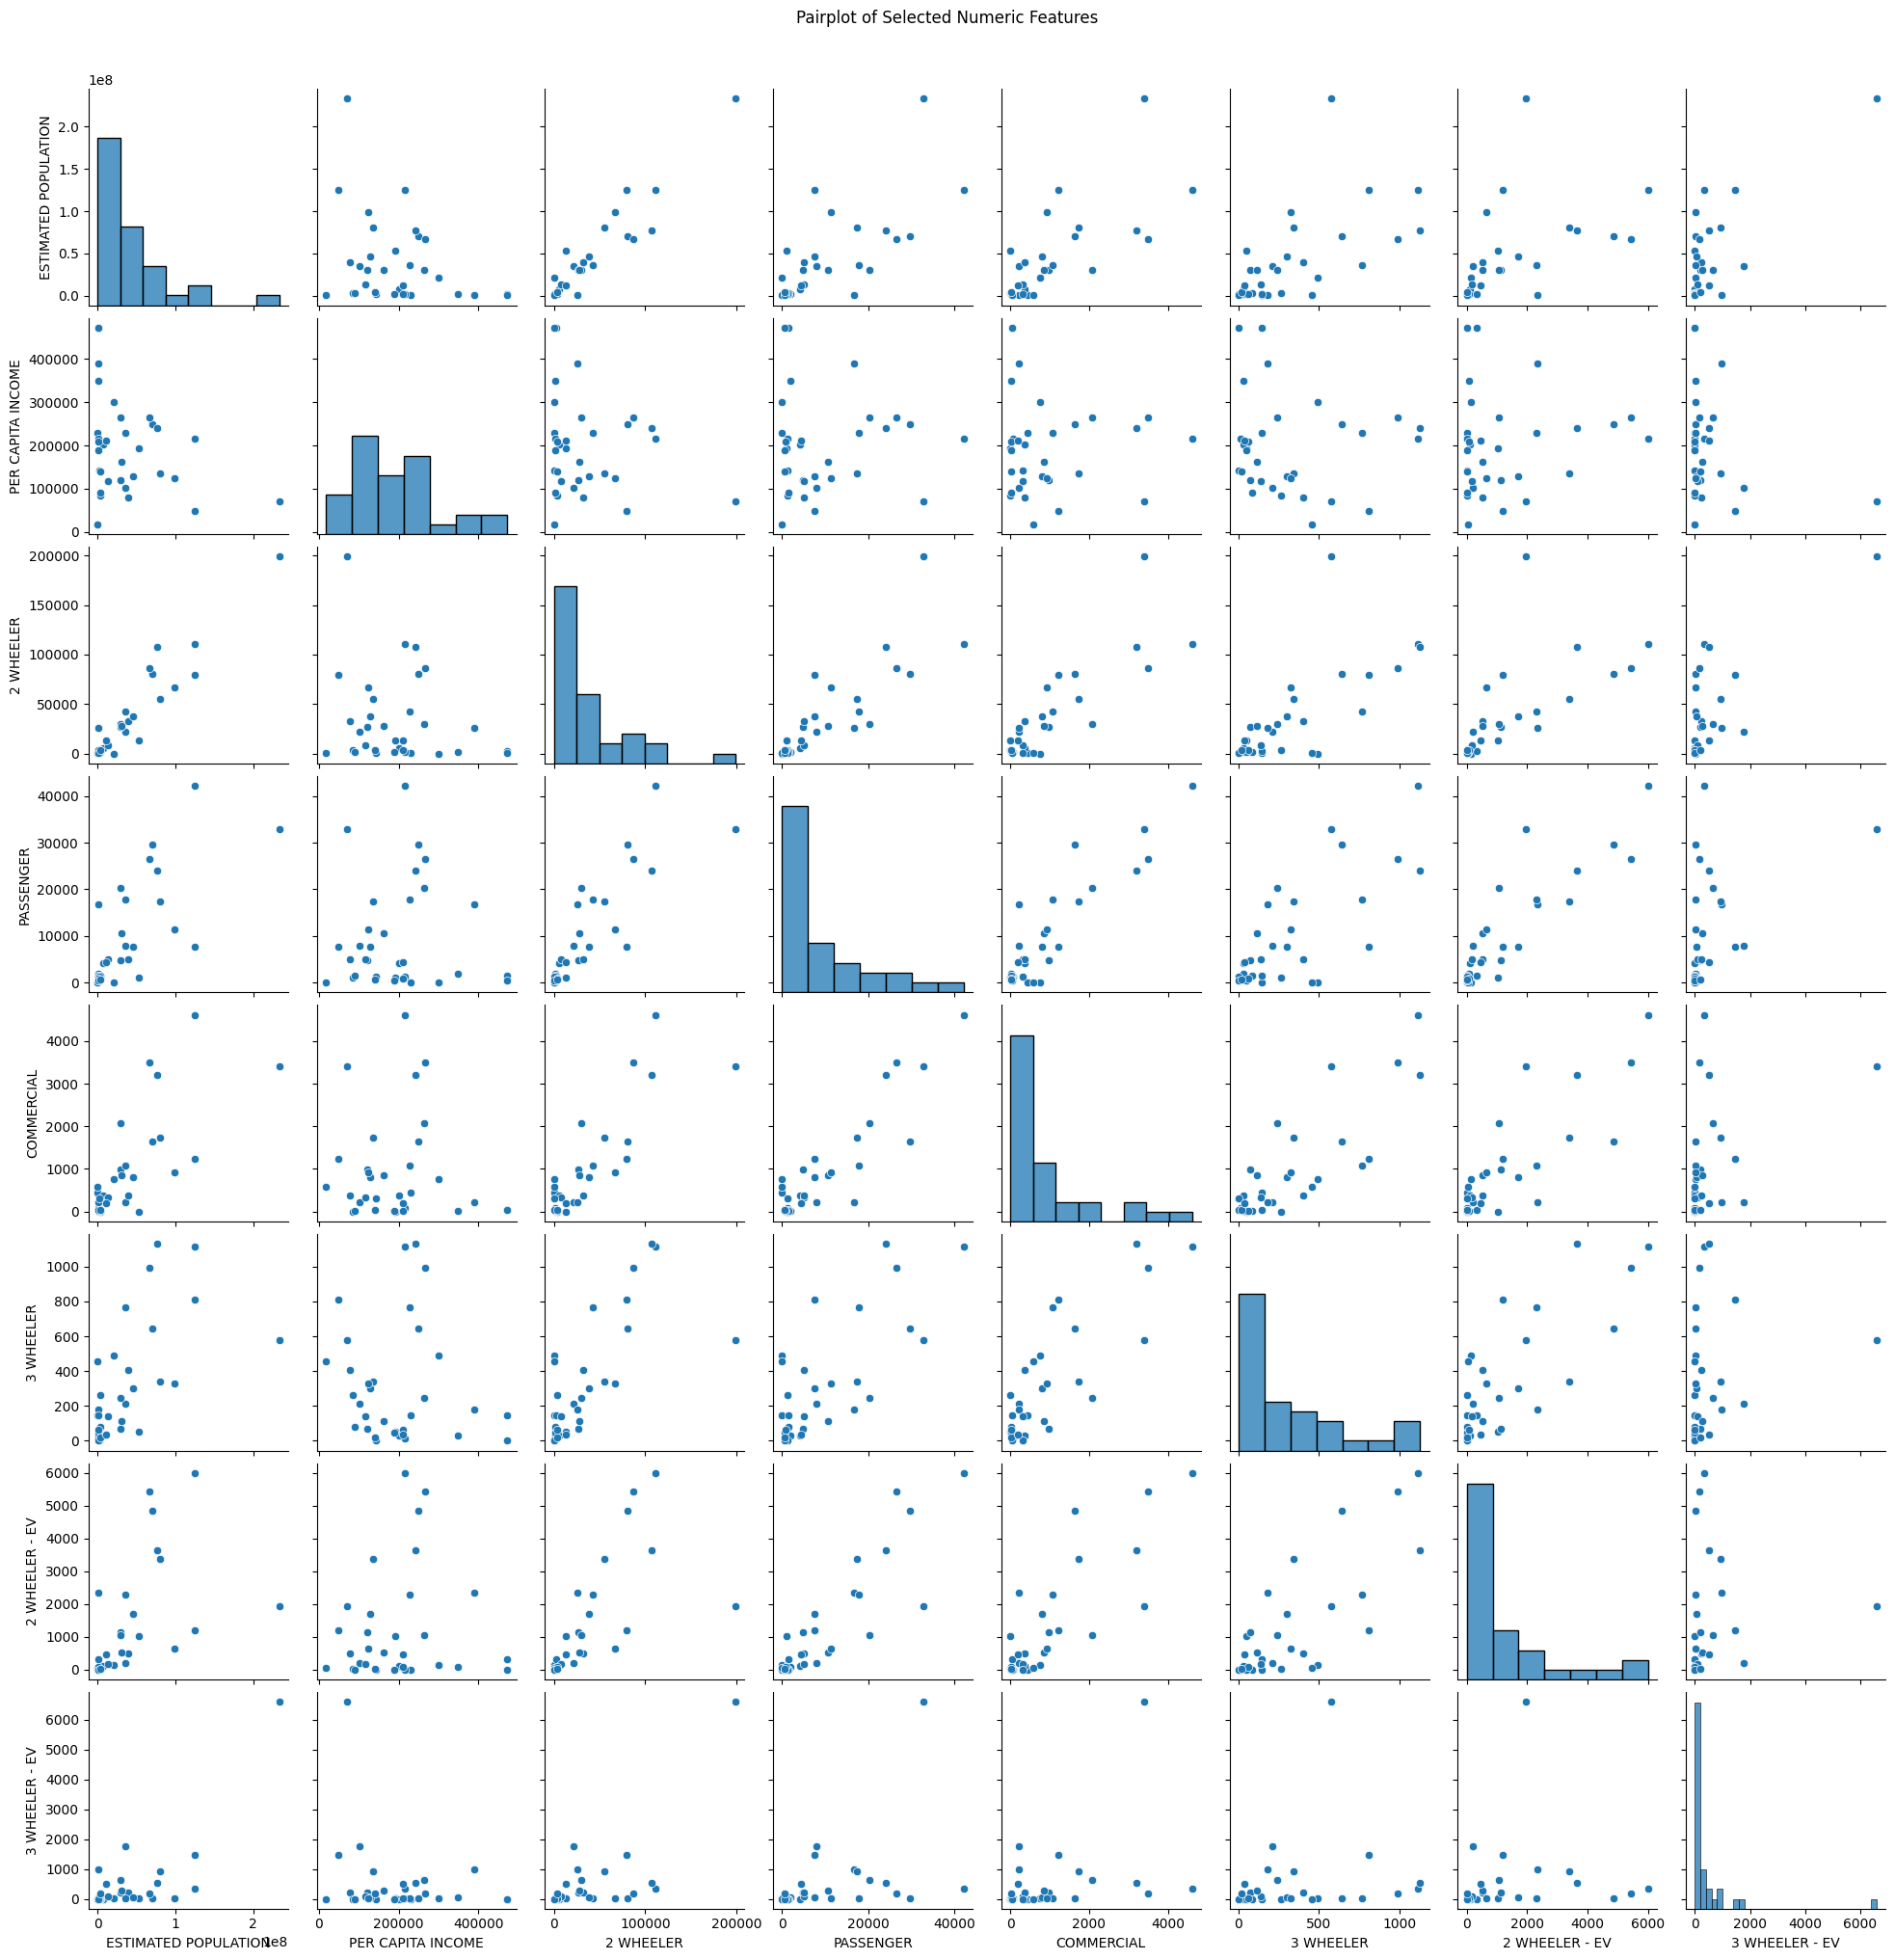

In [17]:
# Pairplot for selected numeric features
selected_numeric = ['ESTIMATED POPULATION', 'PER CAPITA INCOME', '2 WHEELER', 'PASSENGER', 'COMMERCIAL', '3 WHEELER', '2 WHEELER - EV', '3 WHEELER - EV']
sns.pairplot(df[selected_numeric])
plt.suptitle('Pairplot of Selected Numeric Features', y=1.02)
plt.show()

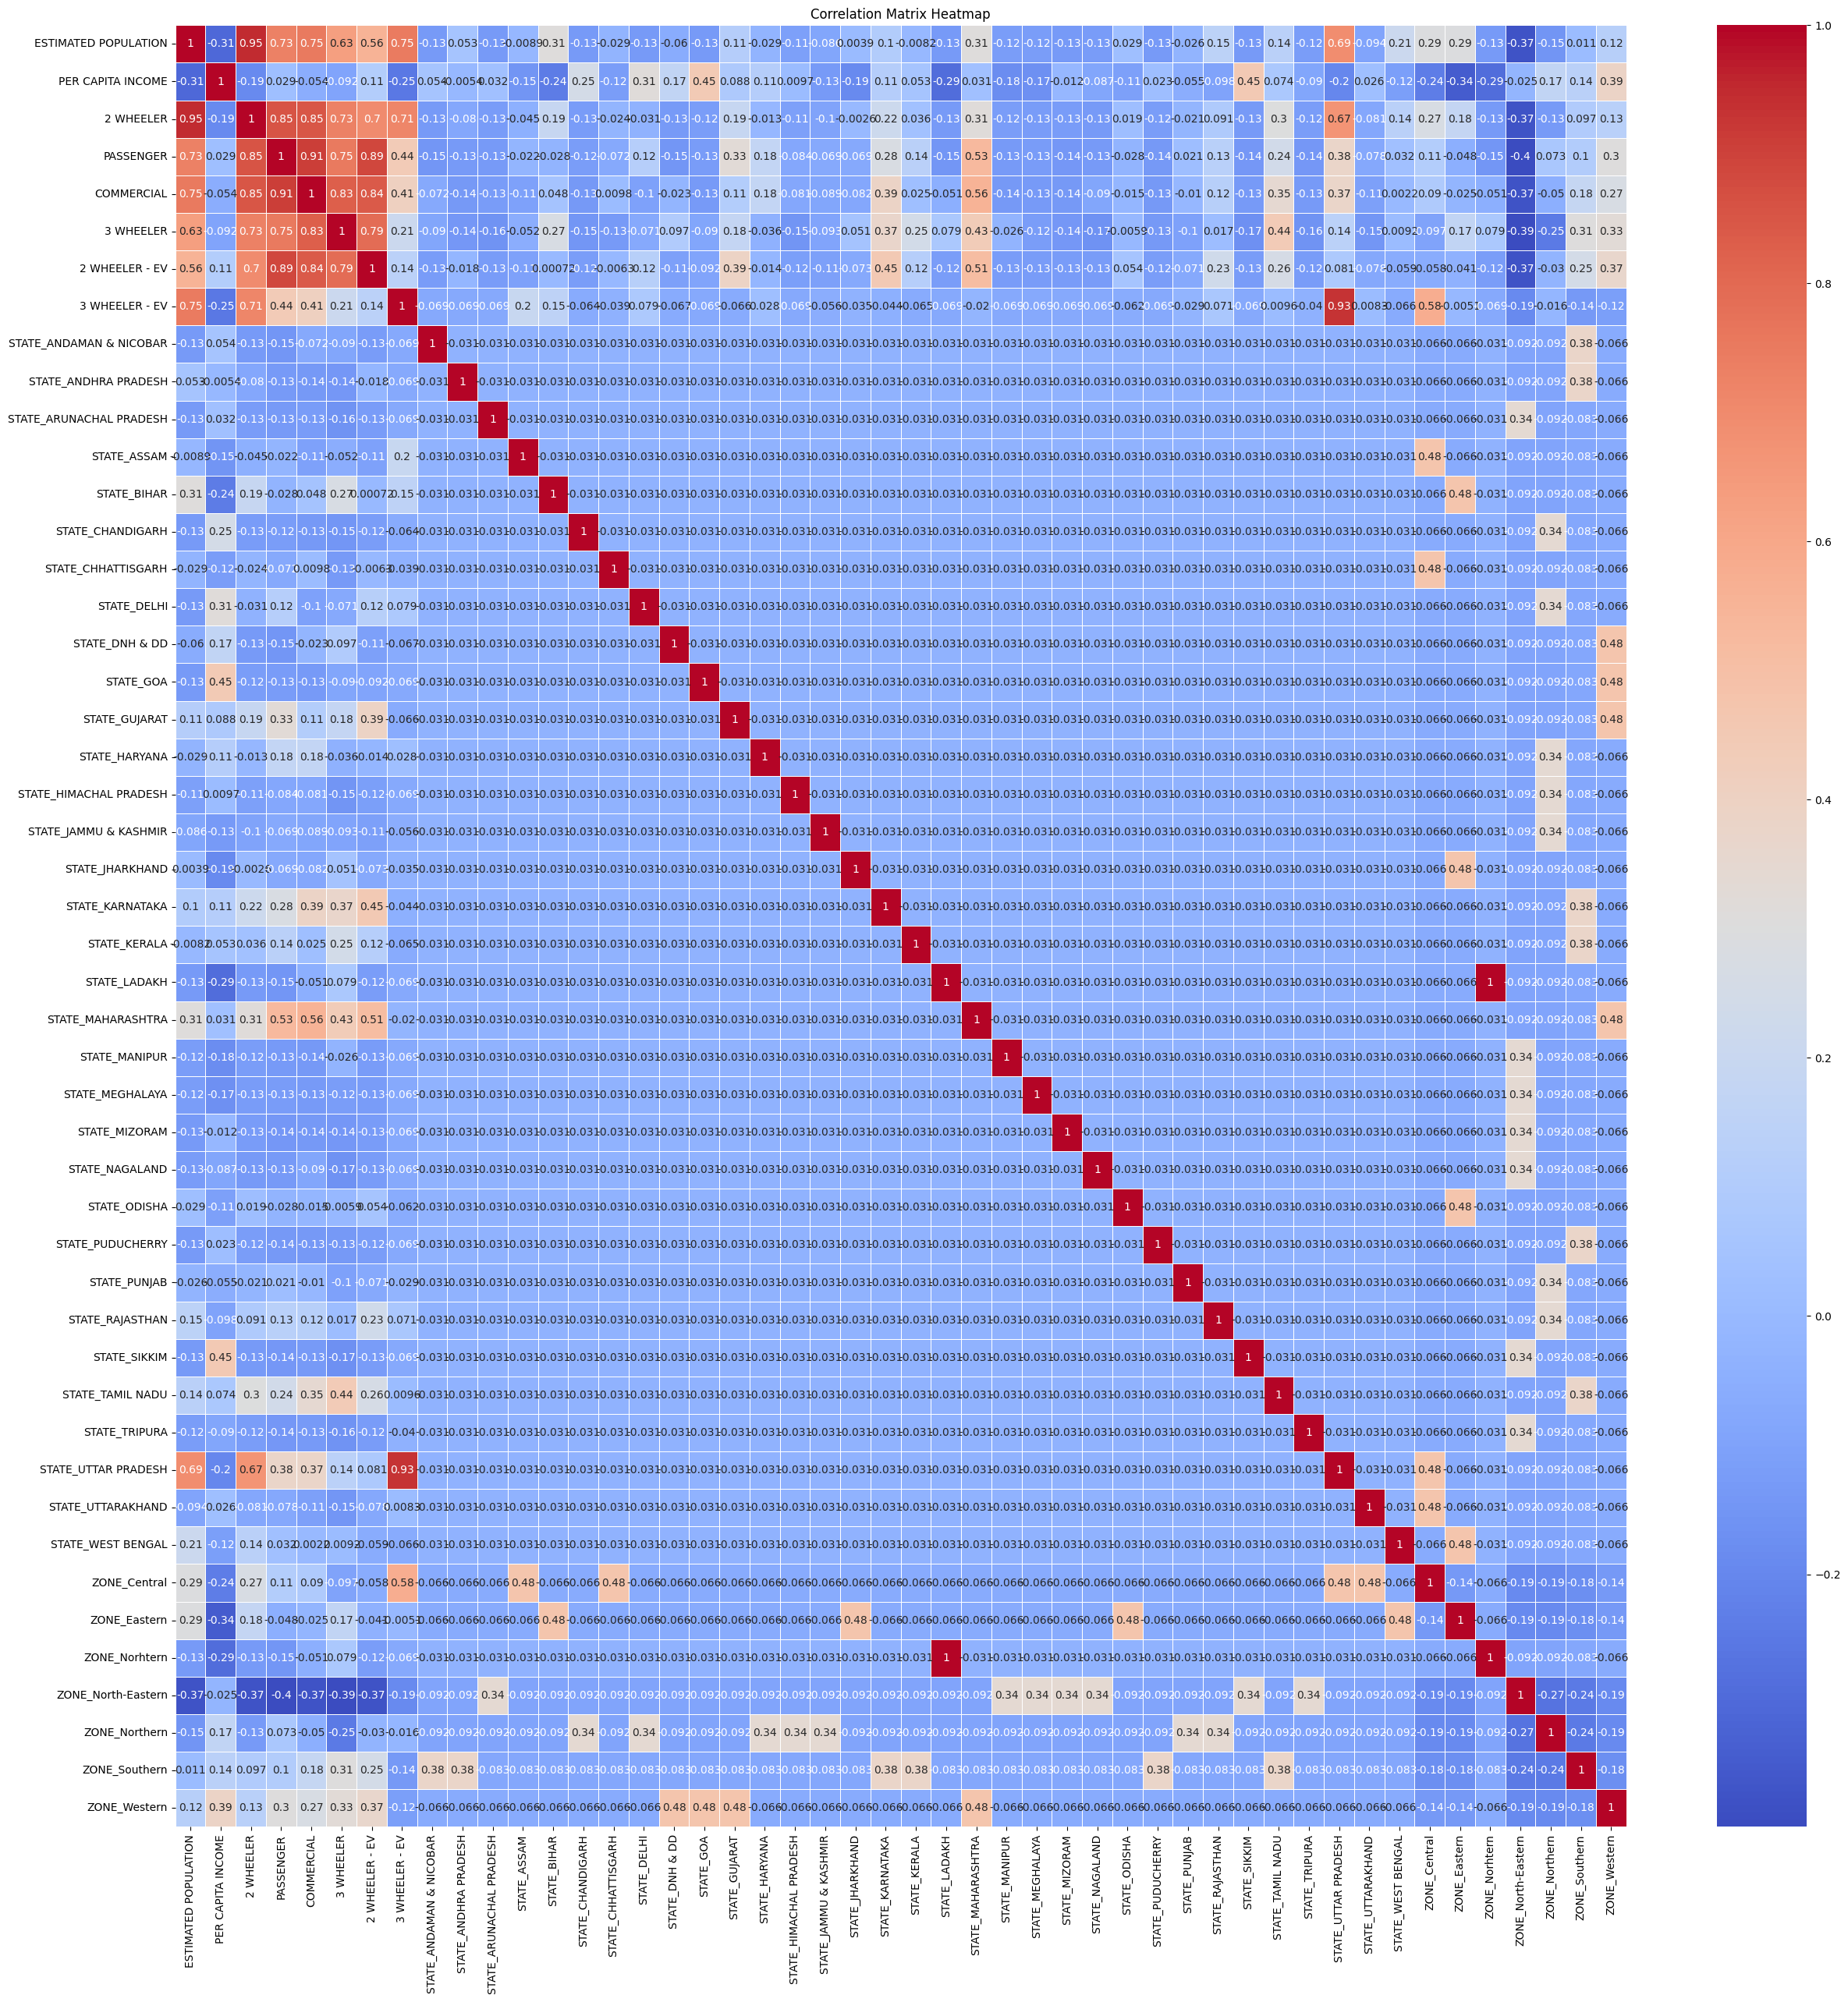

In [18]:
# Correlation matrix heatmap
# Encoding for non-numeric features
df_encoded = pd.get_dummies(df, columns=['STATE', 'ZONE'])
corr_matrix = df_encoded.corr()
plt.figure(figsize=(30, 30)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

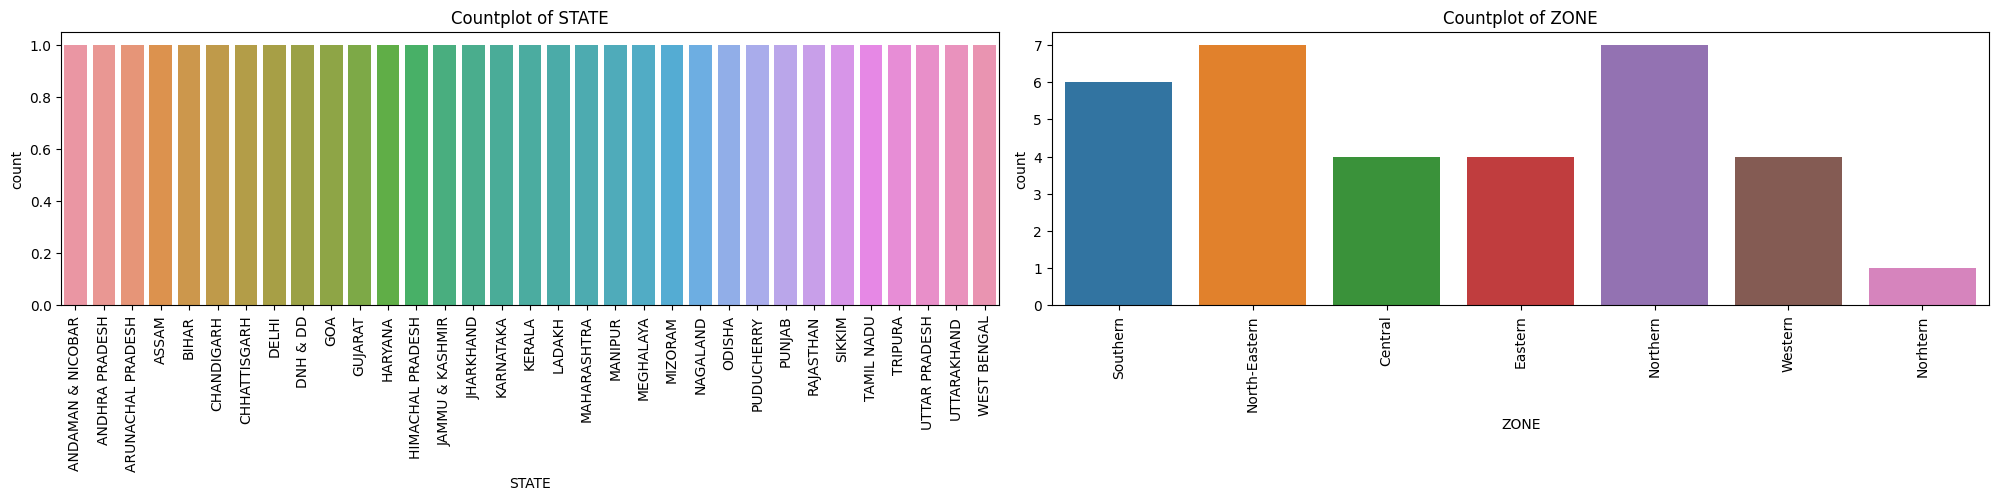

In [19]:
# Categorical features

# Countplot for categorical features
categorical_features = df.select_dtypes(exclude=[np.number])
plt.figure(figsize=(30, 8))
for i, column in enumerate(categorical_features.columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
# Cross-tabulation for categorical features
cross_tabs = {}
for column in categorical_features.columns:
    cross_tab = pd.crosstab(df[column], columns='count')
    cross_tabs[column] = cross_tab
print(cross_tabs)

{'STATE': col_0              count
STATE                   
ANDAMAN & NICOBAR      1
ANDHRA PRADESH         1
ARUNACHAL PRADESH      1
ASSAM                  1
BIHAR                  1
CHANDIGARH             1
CHHATTISGARH           1
DELHI                  1
DNH & DD               1
GOA                    1
GUJARAT                1
HARYANA                1
HIMACHAL PRADESH       1
JAMMU & KASHMIR        1
JHARKHAND              1
KARNATAKA              1
KERALA                 1
LADAKH                 1
MAHARASHTRA            1
MANIPUR                1
MEGHALAYA              1
MIZORAM                1
NAGALAND               1
ODISHA                 1
PUDUCHERRY             1
PUNJAB                 1
RAJASTHAN              1
SIKKIM                 1
TAMIL NADU             1
TRIPURA                1
UTTAR PRADESH          1
UTTARAKHAND            1
WEST BENGAL            1, 'ZONE': col_0          count
ZONE                
Central            4
Eastern            4
Norhtern           1
N

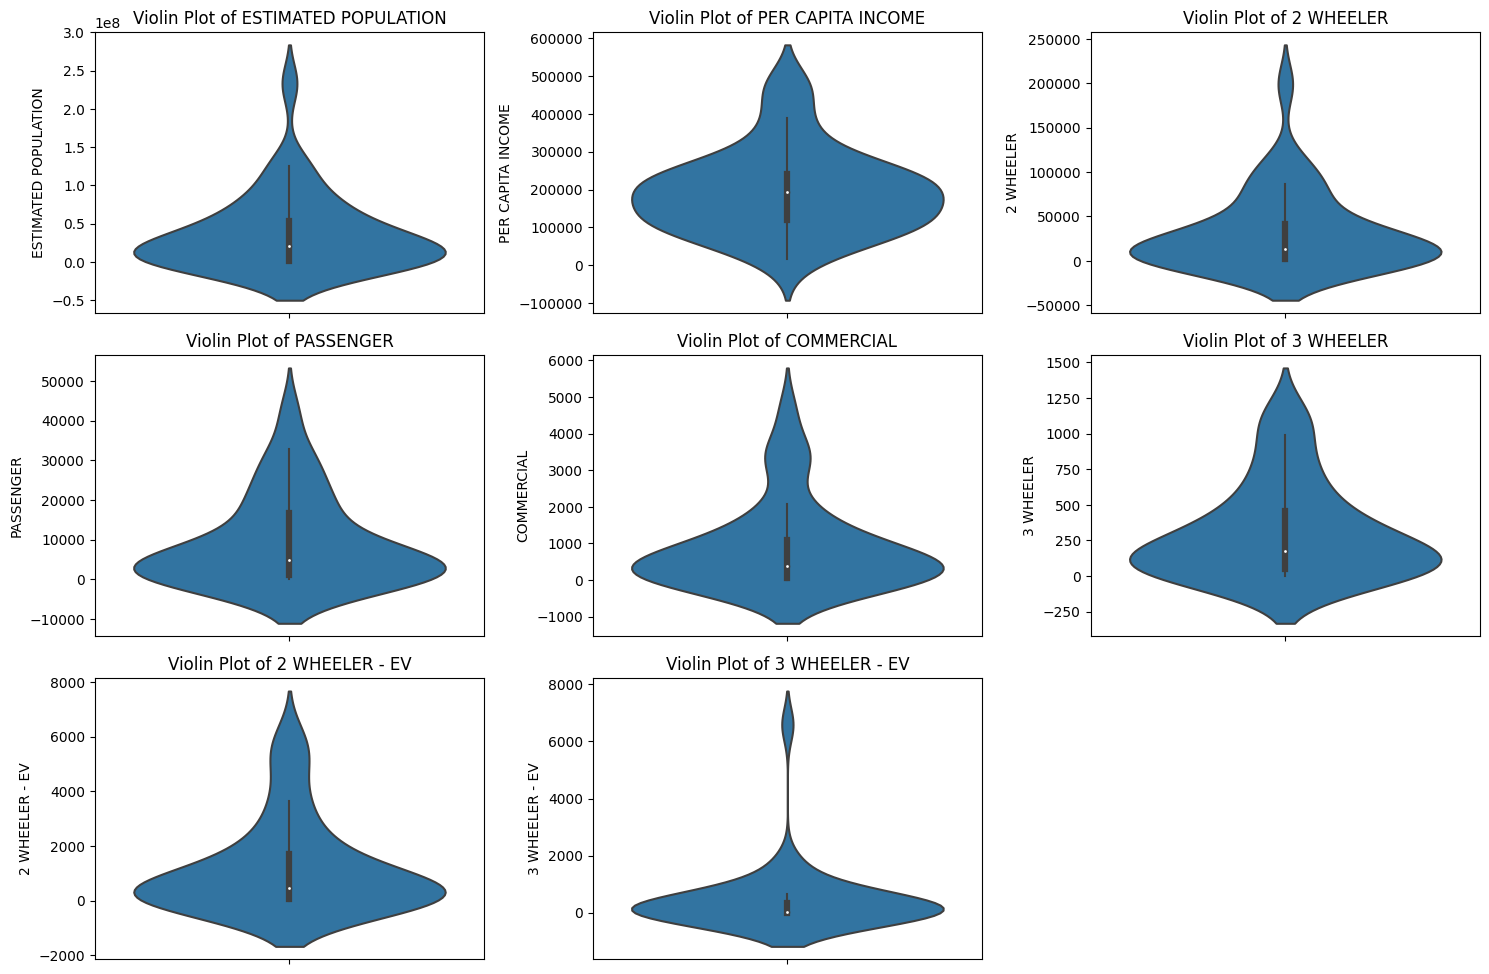

In [21]:
# Distribution of numeric features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(data=df, y=column)
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()

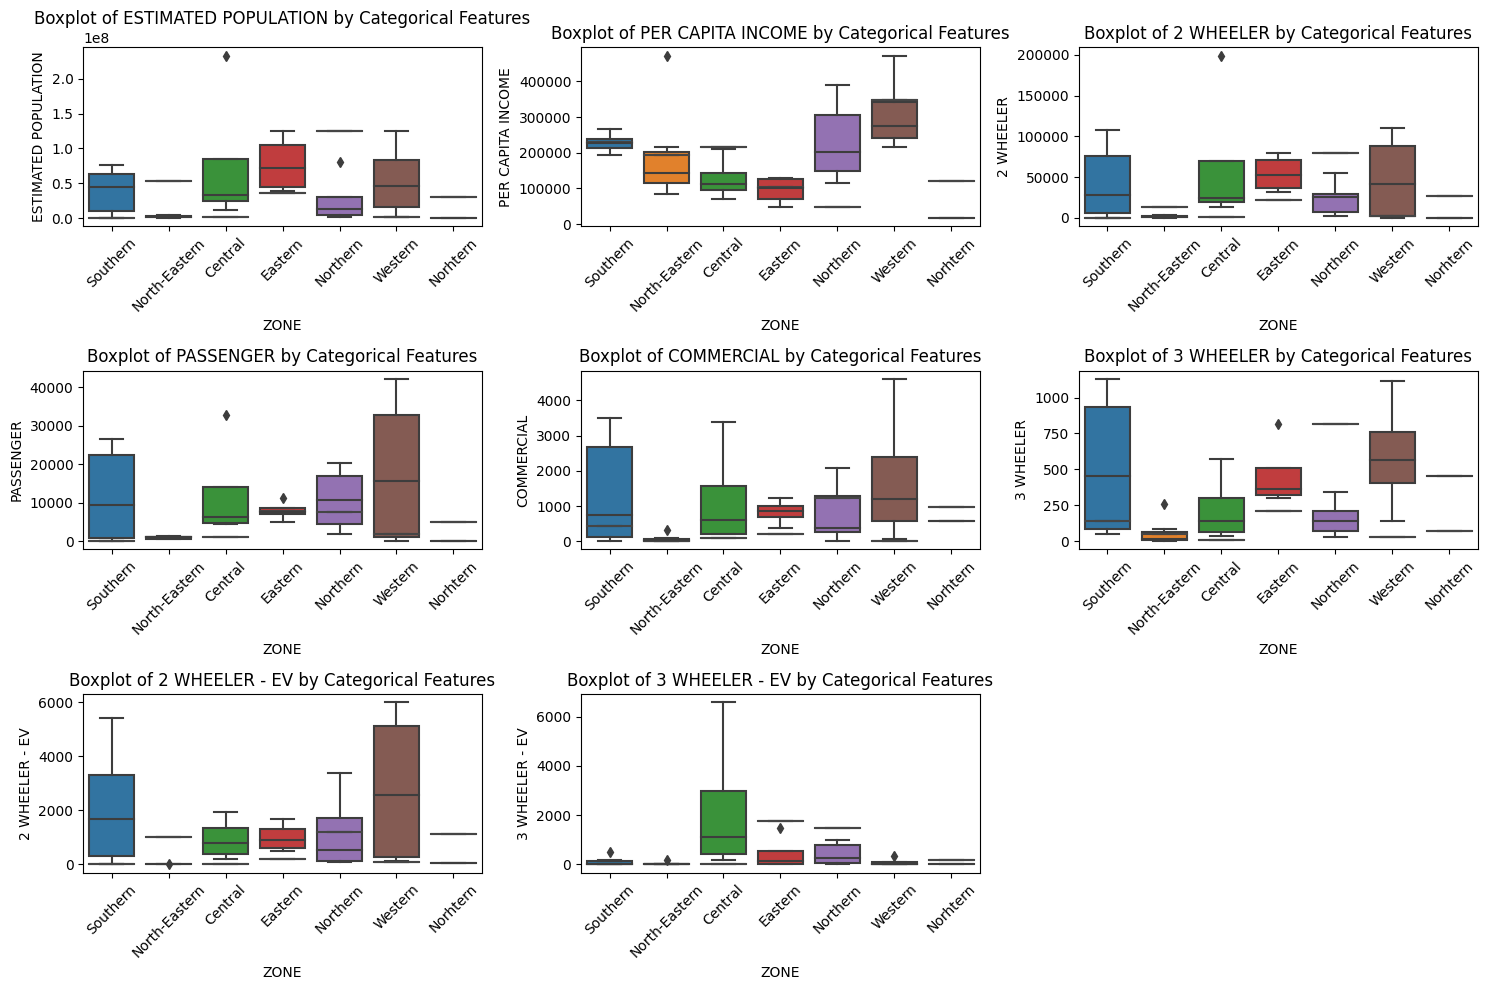

In [35]:
# Analysis of relationships between numeric and categorical features
plt.figure(figsize=(15, 10))
for i, num_col in enumerate(numeric_features.columns, 1):
    plt.subplot(3, 3, i)
    for cat_col in ['STATE', 'ZONE']:
        sns.boxplot(data=df, x=cat_col, y=num_col)
    plt.title(f'Boxplot of {num_col} by Categorical Features')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

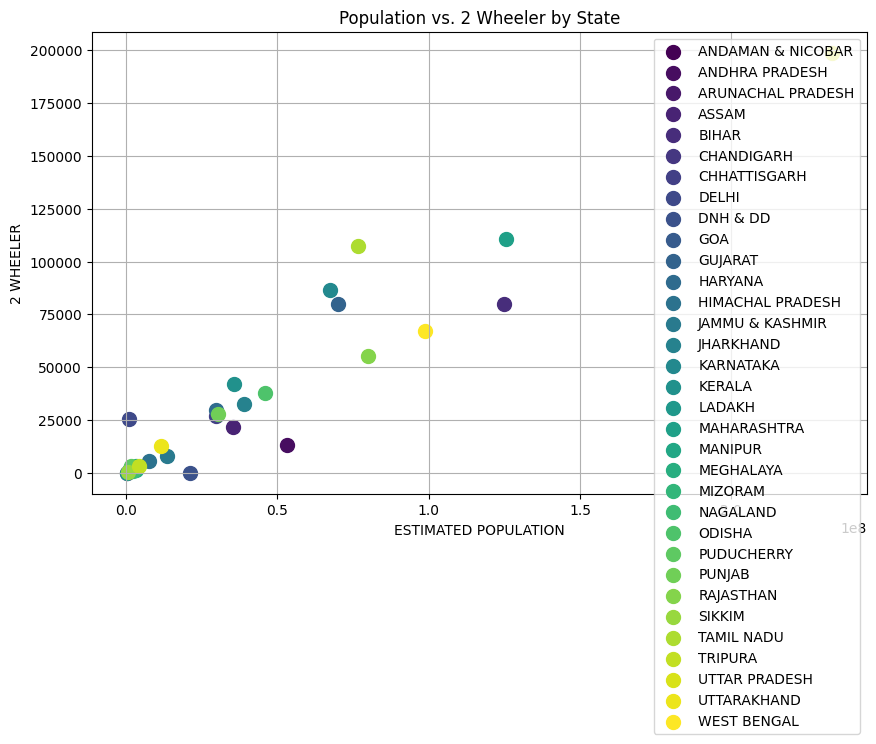

In [23]:
# Create a scatter plot with different colors for each point using a colormap
plt.figure(figsize=(10, 6))

# Generate a colormap based on the number of data points
colors = plt.cm.viridis(np.linspace(0, 1, len(df)))

for i, row in df.iterrows():
    plt.scatter(
        row['ESTIMATED POPULATION'],
        row['2 WHEELER'],
        label=row['STATE'],
        color=colors[i],
        marker='o',
        s=100  # Marker size
    )

# Add labels and title
plt.xlabel('ESTIMATED POPULATION')
plt.ylabel('2 WHEELER')
plt.title('Population vs. 2 Wheeler by State')

# Display legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [24]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
# Select relevant features and standardize them
# Select relevant columns for segmentation
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Assuming 'ZONE' and 'STATE' is the existing categorical column in your DataFrame 'df'
df['ZONE_ENCODED'] = label_encoder.fit_transform(df['ZONE'])
df['STATE_ENCODED'] = label_encoder.fit_transform(df['STATE'])


selected_features = ['STATE_ENCODED', 'ZONE_ENCODED', 'ESTIMATED POPULATION', 'PER CAPITA INCOME', '2 WHEELER - EV', '3 WHEELER - EV']

X = df[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

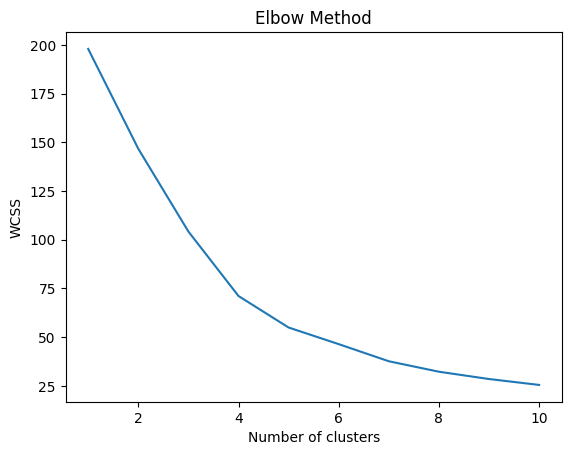

In [36]:
# Determine the optimal number of clusters (K) using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=30, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
# Plot the Elbow Method results to find the optimal K
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [79]:
k = 4  # You can choose the optimal K from the plot
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [80]:
# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Get cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

In [81]:
# Visualize clusters using PCA for dimensionality reduction (2D plot)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)


[0.39894931 0.27271664]


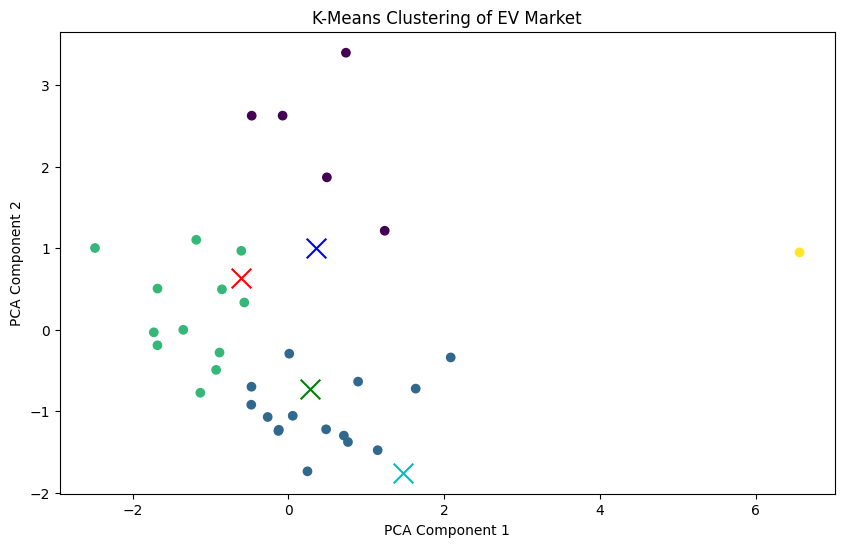

In [82]:
# Visualize clusters using PCA for dimensionality reduction (2D plot)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
# Plot the centroids
# Create a scatter plot with different colors for each cluster
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c=colors[i], marker='x', s=200, label=f'Centroid {i}')

plt.title('K-Means Clustering of EV Market')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [83]:
# Access the cluster centroids
centroids = kmeans.cluster_centers_

# Access the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Now, you can associate each centroid with its respective cluster
cluster_centroids = {}
for cluster_id in range(4):
    cluster_data = X[cluster_labels == cluster_id]
    cluster_centroids[cluster_id] = centroids[cluster_id]

# Print or access the cluster centroids
for cluster_id, centroid in cluster_centroids.items():
    print(f"Cluster {cluster_id} Centroid: {centroid}")

Cluster 0 Centroid: [ 0.35707142  1.00758265  0.92015865  0.23640597  2.09377924 -0.05538229]
Cluster 1 Centroid: [ 0.27305462 -0.72751974 -0.16699757 -0.72304661 -0.45385643 -0.11708553]
Cluster 2 Centroid: [-0.61262254  0.635775   -0.50066818  0.90125443 -0.34336751 -0.26867266]
Cluster 3 Centroid: [ 1.47029409 -1.75441708  3.91218837 -1.15138381  0.45936034  5.25726629]


In [84]:
# Analyze each cluster and its characteristics
cluster_means = df.groupby('Cluster')[selected_features].mean()
print(cluster_means)

         STATE_ENCODED  ZONE_ENCODED  ESTIMATED POPULATION  PER CAPITA INCOME  \
Cluster                                                                         
0            19.400000      5.200000          8.384000e+07      221609.800000   
1            18.600000      1.933333          2.956993e+07      117341.466667   
2            10.166667      4.500000          1.291333e+07      293862.083333   
3            30.000000      0.000000          2.332000e+08       70792.000000   

         2 WHEELER - EV  3 WHEELER - EV  
Cluster                                  
0           4659.800000      389.800000  
1            440.600000      317.800000  
2            623.583333      140.916667  
3           1953.000000     6589.000000  


## Conclusions

#### Based on our data analysis and visualizations, we have identified key insights:


- The Western and Southern Zones of India, with a per capita income above 2 Lakh, exhibit significant potential for the 2-wheeler electric vehicle (EV) market.
  
- The 2-wheeler EV market is in its early stages in the Northern Zone, but it shows promise for future growth.

- The 3-wheeler EV market is experiencing rapid growth in the Central Zone of India.

- Economic Status Impact: Regions with a higher per capita income tend to have a greater potential for adopting electric vehicles, particularly 2-wheelers.

- Regional Variations: India's electric vehicle market exhibits regional variations, with the Western and Southern Zones being more receptive to 2-wheeler EVs.

- Growth Potential: The Northern Zone, despite being in the early stages of adoption, shows promise for future growth in the 2-wheeler EV market.

- Focus on 3-Wheelers: The Central Zone has witnessed significant growth in the 3-wheeler EV market, indicating a preference for this type of electric vehicle.

- Future Opportunities: To capitalize on the growing demand for EVs, businesses and policymakers should focus on tailoring their strategies to each specific region's preferences and economic conditions.

- Market Expansion: The data suggests that the Indian electric vehicle market has the potential for further expansion, offering opportunities for investment and development.

- Sustainable Transportation: The increasing adoption of electric vehicles aligns with the global shift towards sustainable transportation solutions and reducing carbon emissions.